Kaggle Heart Disease Project

data file taken from site : https://www.kaggle.com/ronitf/heart-disease-uci

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Columns descriptions:

age : in years

sex :(1 = male; 0 = female)

cp: chest pain type (0-4)

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results (0-2)

thalach : maximum heart rate achieved

exang : exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment

ca :number of major vessels (0-3) colored by flourosopy

tha : l3 = normal; 6 = fixed defect; 7 = reversable defect

target : presence of heart disease (1 = presence of heart disease or 0 = presence of heart disease)



We can divide the features above into two groups: quantitative and categorical

Quantitative features: Age, trestbps, chol, thalach, oldpeak

Categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [90]:
heart_df = pd.read_csv('C:/Users/Busaba/Desktop/Launchcode Data_Science/Kaggle Heart Final Project/heart-disease-uci/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Conclusion: 303 incidents included in this study. 
Mean age is 54 years old.
75% of samples are around 61 years old or older, with the max age is 77 years old.
50% of samples have a  resting blood pressure at 130,  serum cholesterol level of 240 mg/dl, and maximum heart rate of 153.

In [92]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [93]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

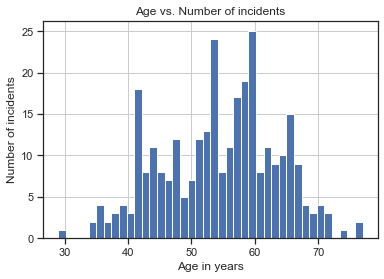

In [94]:
x = heart_df.age
plt.hist(x, bins=40)
plt.xlabel("Age in years")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Age vs. Number of incidents')
plt.show()


In [95]:
mean_age = x.mean()
mean_age

54.366336633663366

Conclusion of this age graph, it appears that most people are suffering from heart attacks are between the ages of 50 - 60. The mean age of a person who suffered a heart attack was 54.4. 

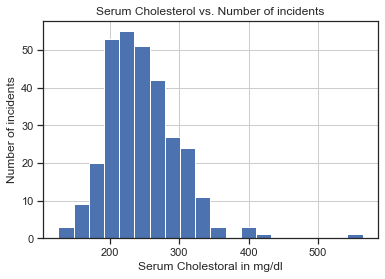

In [96]:
x = heart_df.chol
plt.hist(x, bins=20)
plt.xlabel("Serum Cholestoral in mg/dl")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Serum Cholesterol vs. Number of incidents')
plt.show()

In [97]:
mean_chol = x.mean()
mean_chol

246.26402640264027

Conclusion of this serum cholestoral graph, it appears that most people are have high serum cholesterol levels between 200-300 mg/dl. The mean serum cholesterol level of a person was 246.3. 

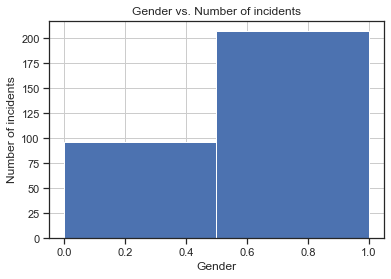

In [98]:
x=heart_df.sex
plt.hist(x,bins=2)
plt.xlabel("Gender")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Gender vs. Number of incidents')
plt.show()


In [99]:
total = len(heart_df['sex'])
male = sum(heart_df['sex'] == 1)
female = sum(heart_df['sex'] == 0)
total



303

In [100]:
percent_men= (male/total)*100
percent_women=(female/total)*100

print(percent_women)
print(percent_men)

31.683168316831683
68.31683168316832


Conclusion of this gender graph, it appears that more men (68.32%) suffer from heart attacks than women (31.68%). 

149.64686468646866

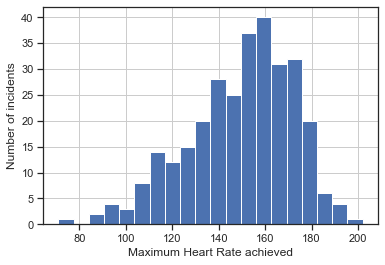

In [101]:
x = heart_df.thalach
plt.hist(x, bins=20)
plt.xlabel("Maximum Heart Rate achieved")
plt.ylabel("Number of incidents")
plt.grid()
mean_maxhr = x.mean()
mean_maxhr

Conclusion of this max HR graph, the maximum heart rate acheived for most patients was about 160 bpm, with the average being 150 bpm.

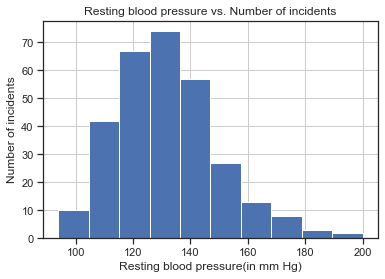

In [102]:
x = heart_df.trestbps
plt.hist(x,bins = 10)
plt.xlabel("Resting blood pressure(in mm Hg)")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Resting blood pressure vs. Number of incidents')
plt.show()


In [103]:
mean_bp = x.mean()
mean_bp


131.62376237623764

Conclusion of this resting blood pressure graph, most  patients prior to admission lies between 120 and 140. The mean resting blood pressure was 131.62.

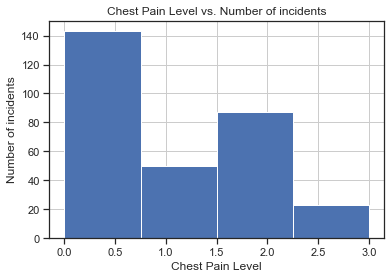

In [104]:
x = heart_df.cp
plt.hist(x,bins = 4)
plt.xlabel("Chest Pain Level")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Chest Pain Level vs. Number of incidents')
plt.show()


The conclusion of the chest pain graph, it tells us that a high number of incidents occurred  at chest pain level 0 for people who suffered a heart attack.


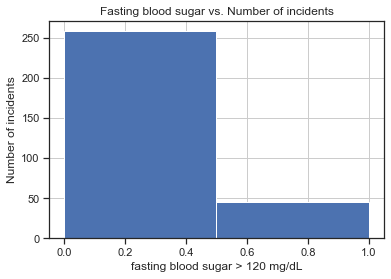

In [105]:
x = heart_df.fbs
plt.hist(x,bins = 2)
plt.xlabel("fasting blood sugar > 120 mg/dL")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Fasting blood sugar vs. Number of incidents')
plt.show()


In [106]:
fbs_0= sum(x==0)
fbs_0

258

In [107]:
fbs_1= sum(x==1)
fbs_1


45

The conclusion of the fasting blood sugar graph, 0 means fasting blood sugar was not more than 120 mg/dl. It appears that 258 people had a fasting blood sugar level less than 120mg/dL and only 45 people had a fasting blood sugar level higher than 120mg/dL. 


Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

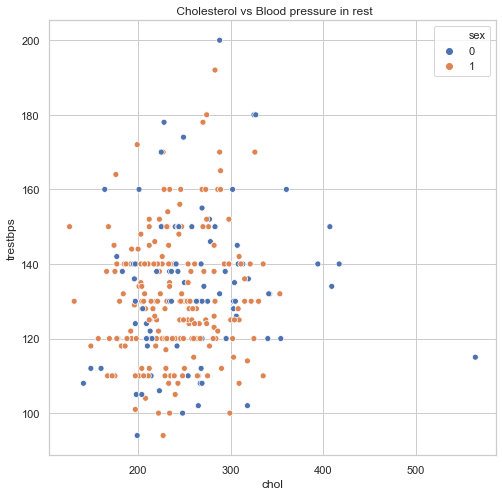

In [113]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=heart_df)
plt.title(' Cholesterol vs Blood pressure in rest')

Conclusion: There is one outlier with one patient with over 500 has very  high cholesterol. There was no presence of separate clusters as there are increasing the serum cholesterol levels or resting blood pressure. 

Text(0.5, 1.0, 'Age vs Cholesterol')

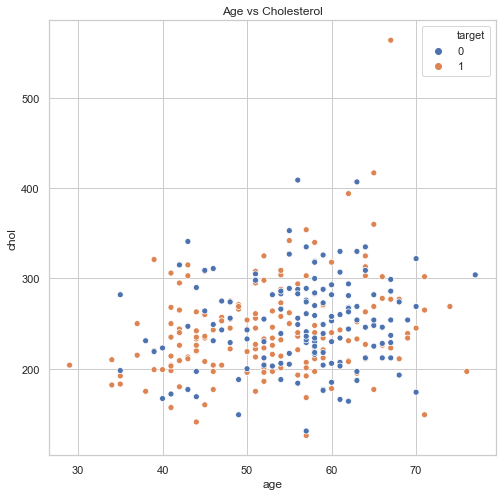

In [117]:
sns.scatterplot(x='age', y='chol', hue='target', data = heart_df)
plt.title('Age vs Cholesterol')

In [ ]:
Conclusions: The highest density of the presence of heart disease represented by blue dots occurs in the range of serum cholesterol levels between 200-300 mg/dl and between the ages of 50 - 60. 


Separating values by genders

In [108]:
heart_female=heart_df[heart_df.sex==0]
heart_female=heart_female.reset_index()
heart_female.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [109]:
heart_male=heart_df[heart_df.sex==1]
heart_male=heart_male.reset_index()
heart_male.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
